# Distributions

In this section we are going to see how to describe variables in statistical terms using pandas and numpy.

Let's first import the data we used in the pandas.ipynb notebook together with some libraries.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('Dataframe_UDs.csv', sep=',', skiprows=4)

In [35]:
data

,Up_dur,Down_dur,id,level
0,0.515100,2.973300,0,deep
1,0.362100,1.076100,0,deep
2,0.387600,1.626900,0,deep
3,0.331500,0.851700,0,deep
4,0.703800,1.739100,0,deep
...,...,...,...,...
1548,0.834854,0.267833,9,sleep
1549,1.182382,0.248758,9,sleep
1550,0.787297,0.298405,9,sleep
1551,0.637833,0.304153,9,sleep


A simple way to discribe one variable is by listing the values that appear in its elements together with their frequency, i.e. the number of times they appear. This representation is called the distribution of the variable.

We come to distributions in a moment but first we have to distinguish types of variables.

In general there are two type of variables: categorical, those that can only take discrete values (like 1, 2, 3 or "rat", "mouse", "ferret") and continuous, that can take any value between two extremes (which can also be -Inf and +Inf). Also categorical variables can be ordered (like 'bad', 'fair', 'good') or unordered as in the previous example of animals (unless you want to see any evolutionary order in those species). Categorical variables are also sometimes called factor variables, for example in the context of ANOVA.

We first deal with discrete variable and then with continuous ones.

## Discrete

You can imagine the distribution of a variable as a simple map from values to frequencies.

As you might remember we wrote some code to calculate a histogram in the [dictionaries section](dictionaries.ipynb).

In [ ]:
def histogram(s):
    d = dict()
    for c in s:
        d[c] = d.get(c, 0) + 1
    return d

Let's use it to calculate the histogram of our variable.

In [34]:
histogram(data.level)

{'deep': 518, 'light': 534, 'sleep': 501}

We can compute the distribution of a variable with `np.histogram` function.

In our data set there is a discrete variable: `level`. Let's see what its distribution look like. But first we have to transform the values of the variable in something numpy can handle (numbers). Pandas method `map` comes in handy.

In [36]:
level_num = data.level.map({'deep':1, 'light':0, 'sleep':2}).values
np.unique(level_num)

array([0, 1, 2])

Now that we got our variable mapped to numbers we can calculate the **histogram**.

In [37]:
np.histogram(level_num, bins=[0, 1, 2, 3])

(array([534, 518, 501]), array([0, 1, 2, 3]))

as you can see `np.histogram` returns an array with the frequencies and an array with the values. There is an additional value that doesn't appear in our variable, we'll see why when we come to continuous variables.

It's common to visualize histograms as bar graphs. We could do a bar graph out of the output of `np.histogram` but matplotlib as a useful function that integrates histogram calculation and plotting.

(array([534., 518., 501.]), array([0, 1, 2, 3]), <a list of 3 Patch objects>)

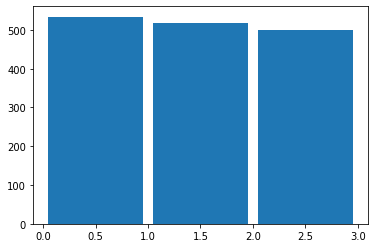

In [40]:
plt.hist(level_num, bins=[0, 1, 2, 3], rwidth=.9)

`rwidth` parameter allows you to put some space between bars (if you set it it 1 there's no space).

As you can see there is a problem with labels on the x-axis but the numeric labels are also not so interesting for us. This can be fixed but it's even easier to let pandas take care of everything.

The method `value_count` counts the occurrencies of each value in a column of a DataFrame (the frequency), even if values are not numbers (so we don't need to do any mapping). There is also a pandas method `plot` to plot the result. And everything can be written in just one line.

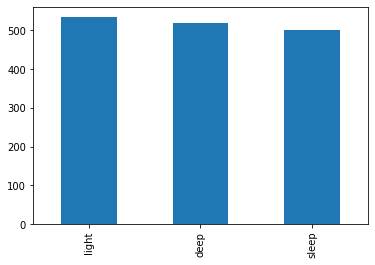

In [41]:
data.level.value_counts().plot(kind='bar')

With pandas it's very easy to take a subsample of your data. And of course when you take a random subsample you would expect your distribution to be roughly the same.

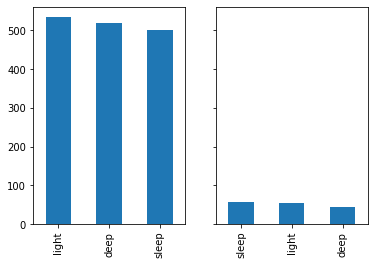

In [43]:
subsample = data.sample(frac=.1)
fig, axs = plt.subplots(ncols=2, sharey=True)
data.level.value_counts().plot(kind='bar', ax=axs[0])
subsample.level.value_counts().plot(kind='bar', ax=axs[1])

Given the different number of elements in the two samples it's not easy to compare their distribution.
In this case it's still feasible given the low number of levels of the variable but in general when you are comparing two distributions with different number of elements it's better to divide each count by the number of elements, this transforms the frequency in a fraction or probability.
You can do this easily with `plt.hist`.

(array([0.34385061, 0.33354797, 0.32260142]),
 array([0, 1, 2, 3]),
 <a list of 3 Patch objects>)

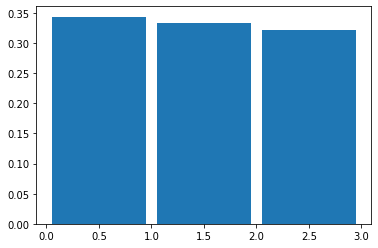

In [44]:
plt.hist(level_num, bins=[0, 1, 2, 3], rwidth=0.9, density=True)

It's quite easy with pandas too, the parameter here is called `normalize`.

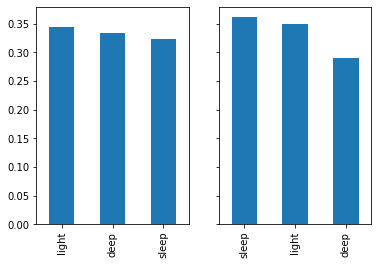

In [45]:
fig, axs = plt.subplots(ncols=2, sharey=True)
data.level.value_counts(normalize=True).plot(kind='bar', ax=axs[0])
subsample.level.value_counts(normalize=True).plot(kind='bar', ax=axs[1])

These representation of discrete distributions are called **probability mass functions** (PMF), because in this graph you can read the probability mass (in contrast to *density* for continuous variables) corresponding to each level of the variable.

## Continuous

When we treat continuous variable it doesn't make sense to list the frequencies of each "level" since it would be an infinite list (between any two values of the variable there are still infinite values). Even if we were trying to compile this list the probability associated to any value would be not really informative, since each exact value has a probability of zero. You can easily understand this as the limiting case of a discrete distribution with increasing number of levels. As you increase the number of levels of the variable the probability of level decreases, so that when you reach infinite levels the probability will be zero. You can try this in the following code playing with `n_levels`.

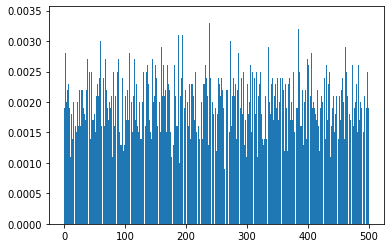

In [48]:
n_levels = 500
justavariable = np.random.randint(0, n_levels, 10000)
_ = plt.hist(justavariable, bins=range(n_levels+1), rwidth=.9, density=True)

With continuous variables it makes sense to ask yourself what is the amount of samples that falls in a given interval of values, i.e. the frequency in that interval. Such intervals are usually called bins in this context.

The function `plt.hist` can directly handle continuous variables.

(array([ 37.,  82., 119., 168., 154., 150., 145., 120.,  87., 110.,  74.,
         68.,  50.,  36.,  37.,  27.,  18.,  21.,   8.,  14.,   5.,   8.,
          5.,   3.,   2.,   2.,   0.,   1.,   0.,   2.]),
 array([0.083232  , 0.14481579, 0.20639958, 0.26798337, 0.32956716,
        0.39115095, 0.45273474, 0.51431853, 0.57590232, 0.63748611,
        0.6990699 , 0.76065369, 0.82223748, 0.88382127, 0.94540506,
        1.00698885, 1.06857264, 1.13015643, 1.19174022, 1.25332401,
        1.3149078 , 1.37649159, 1.43807538, 1.49965917, 1.56124296,
        1.62282675, 1.68441054, 1.74599433, 1.80757812, 1.86916191,
        1.9307457 ]),
 <a list of 30 Patch objects>)

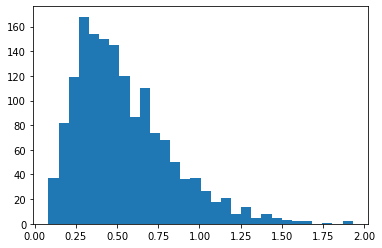

In [55]:
plt.hist(data.Up_dur, bins=30)

Here we passed an integer as the `bins` parameter and let the function compute the bins. You can see the bin edges returned by the function.

The choice of how many bins to use is a difficult one. Ideally one want the bins to be enough to see all meaningful patterns of the distribution (where it rises and falls and levels) and not too much to avoid noise in the counts. In practice you usually don't know what's the distribution of you variable so you should experiment a little bit. In our `Up_dur` variable we have some noise with 50 bins and we definitely loose information with just 5 bins. Try it out by yourself! 

You can also pass a list of bin edges as we did for the categorical variable above. This is sometimes useful if, for example, we want bins that are not equally spaced.

(array([  9.,  94., 217., 263., 245., 173., 171., 122.,  80.,  56.,  41.,
         34.,  18.,  20.,  10.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
        1.3, 1.5, 2. ]),
 <a list of 15 Patch objects>)

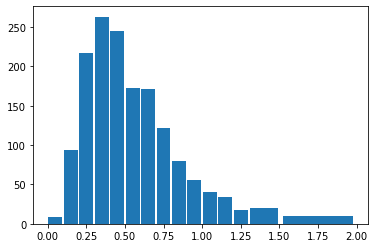

In [56]:
plt.hist(data.Up_dur, bins=[0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1, 1.1, 1.2, 1.3, 1.5, 2], rwidth=.9)

Here we build to larger bins at right end of our distribution. 
Now you also understand why there is an extra value in the list assigned to parameter `bins`: those are not the bin centers but the bin edges so that we need one more than the number of required bins.

We can compare the distribution of two continuous variables such as `Up_dur` and `Down_dur`.

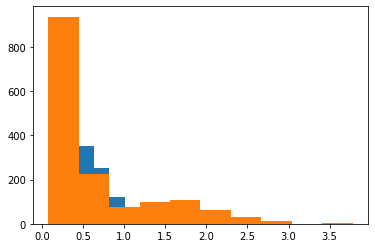

In [57]:
plt.figure()
_ = plt.hist(data.Up_dur, bins=10)
_ = plt.hist(data.Down_dur, bins=10)

Once again it's better to normalize the distributions.

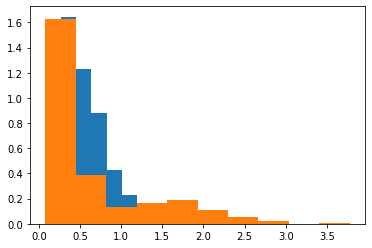

In [58]:
plt.figure()
_ = plt.hist(data.Up_dur, bins=10, density=True)
_ = plt.hist(data.Down_dur, bins=10, density=True)

When you normalize continuous distributions what you get is a map from intervals to density of values, so that if we sum the areas of all bars in the histogram we get the value one. This representation is called a **probability density function** (PDF).

Since the two distributions overlap quite a bit we can switch to a different graphical representation of the PDFs.

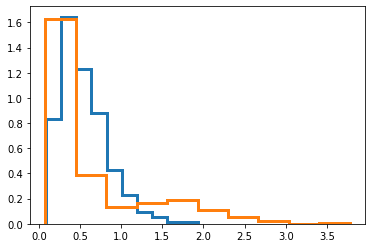

In [59]:
plt.figure()
_ = plt.hist(data.Up_dur, bins=10, density=True, histtype='step', linewidth=3)
_ = plt.hist(data.Down_dur, bins=10, density=True, histtype='step', linewidth=3)

The graphical representation is already satisfying with matplotlib but we can get the same result using pandas directly.

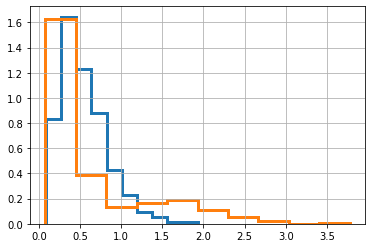

In [60]:
data.Up_dur.hist(density=True, histtype='step', linewidth=3)
data.Down_dur.hist(density=True, histtype='step', linewidth=3)

## Statistics

While a histogram is a complete representation of a distribution we usally summarize distributions by computing single values from the *N* elements in out sample. These values are called statistics.

The most common statistics is the **mean** or average, which discribes the central tendency of the distribution, it's the sum of all values divided by the number of elements:
$$ \bar{x} = \frac{1}{N} \sum_{i=1}^N x_i$$

We can compute the mean of `Up_dur` both using numpy or pandas.

In [61]:
print(np.mean(data.Up_dur))
print(data.Up_dur.mean())

0.539923787186101
0.539923787186101


While the mean tells us how our variable behaves "on average" another useful information is the variability of elements. The most common statistics to summarize variability is **variance** and its transformed version: **standard deviation**.

Variance is defined as:
$$ \sigma^2 = \frac{1}{N} \sum_{i=1}^N (x_i - \bar{x})^2$$

So, if $x$ has units of seconds $\sigma^2$ will have units of seconds squared.
A common transformation appied to variance is the square root, which gives us the **standard deviation**, expressed in the same units as $x$: $\sigma = \sqrt{\sigma^2}$.

Let's compute the variance and standard deviation of our variable.

In [62]:
print(np.var(data.Up_dur))
print(np.std(data.Up_dur))

0.08395614345673642
0.28975186532054703


Mean and standard deviation are so common because they are sufficient statistics for the Gaussian distribution. This means that we can characterize or build a Gaussian distribution using the mean and standard deviation.
Gaussian distributions are very common in nature but for example the distribution of `Up_dur` is not Gaussian.

Another common measure of central tendency is the **median**. But to explain the median we first have to understand **percentiles**.

Percentiles are *values of our variable* that divide the sample in two parts. For example the first percentile is the value such that on its left (i.e. for all lower values) there is the 1% of the distribution and on its right all other values. So, the 75th percentile is the split value where 25% of the density correspond to higher values.

We can compute percentiles easily with numpy.

In [63]:
np.percentile(data.Up_dur, [5, 10, 50, 90, 95])

array([0.186048  , 0.2245632 , 0.4794    , 0.94454724, 1.11119178])

So here we are computing the percentiles 5, 10, 50 and 95.

Quantiles can be used to derive other statistics of dispersion such as **interquartile range**, which is the difference between the percentiles 75 and 25.

In [64]:
np.diff(np.percentile(data.Up_dur, [25, 75]))[0]

0.3757331999999171

Finally the most extreme statistics of dispersion is the **range** of a variable, which is the difference between the the maximum and minimum value.

In [65]:
np.max(data.Up_dur) - np.min(data.Down_dur)

1.852409700000419

The median is the value of the variable that splits the distribution in two parts of equal density. Thus the median is the 50th percentile.

We can compute the median using `np.percentile` or with:

In [66]:
np.median(data.Up_dur)

0.4793999999999414

The median is usually a better statistics of central tendency when the distribution is not symmetric around the mean (such as the distribution of our variables).

For a Gaussian distribution mean and median are coincident.


To conclude there is a useful method in pandas to explore an unknown DataFrame: `describe`.
This method return a table with summary statistics of each column.

In [67]:
data.describe(include='all')

,Up_dur,Down_dur,id,level
count,1553.000000,1553.000000,1553.000000,1553
unique,NaN,NaN,NaN,3
top,NaN,NaN,NaN,light
freq,NaN,NaN,NaN,534
mean,0.539924,0.679102,5.835802,NaN
std,0.289845,0.644969,2.386486,NaN
min,0.083232,0.078336,0.000000,NaN
25%,0.322967,0.267833,3.000000,NaN
50%,0.479400,0.385156,6.000000,NaN
75%,0.698700,0.831300,8.000000,NaN


## Appendix: Random numbers

We have already used random numbers a lot during the course.

Random numbers are generated by sampling from their generative distribution.
The most common distributions are the uniform and the normal.

Let's generate numbers from these distributions and look at their histograms

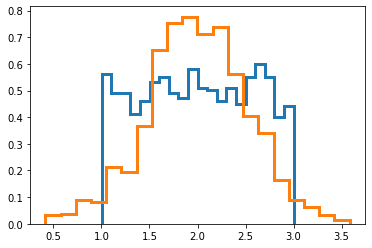

In [68]:
r_uni = np.random.uniform(low=1, high=3, size=1000)
r_norm = np.random.normal(loc=2, scale=.5, size=1000)
plt.figure()
plt.hist(r_uni, bins=20, density=True, histtype='step', linewidth=3)
plt.hist(r_norm, bins=20, density=True, histtype='step', linewidth=3);

We have used before the functions `rand` and `randn`, which mimic matlab functions syntax. When you want to change the parameters of the distributions it's easier and less prone to errors to use `uniform` and `normal`.

### There are other distributions beyond normal and uniform.

When you need to sample integer numbers you can use `randint`.

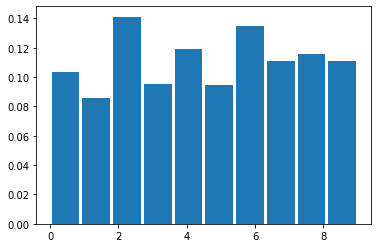

In [71]:
r_int = np.random.randint(low=0, high=10, size=1000)
plt.figure()
plt.hist(r_int, bins=10, density=True, rwidth=.9);

Although not actually producing a distribution a related useful function from `np.random` is `permute`. This function allows you to shuffle the entries of an array.

In [74]:
ordered = np.array([0, 1, 2, 3, 4, 5])
shuffled = np.random.permutation(ordered)
shuffled

array([2, 3, 1, 5, 0, 4])

There are many other distributions you can sample from. For example the gamma distribution is usually used to model waiting times and shows very different shapes of histogram depending on its parameters.

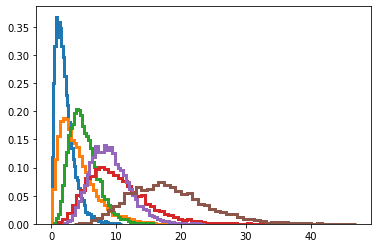

In [75]:
shapes = [2, 5, 9]
scales = [1, 2]
plt.figure()
for sh in shapes:
    for sc in scales:
        r_gam = np.random.gamma(shape=sh, scale=sc, size=10000)
        _ = plt.hist(r_gam, bins=50, density=True, histtype='step', linewidth=3)

This is not a statistics course so we stop here but other distributions you might be interested into are:
* Bernoulli 
* Binomial
* Poisson
* Chi-squared
* Log-normal
* Pareto

You can read more about them in any statistics book or Wikipedia.
And you can sample from them using the functions in [`np.random`](https://numpy.org/doc/stable/reference/random/index.html).

If you are interested in statistical tests you can find a lot of them together with model distributions in [`scipy.stats`](https://docs.scipy.org/doc/scipy/reference/stats.html).

If you are looking for statistical models (linear and non-linear models, ANOVA, etc.) and less common tests you can have a look at [`statsmodels`](https://www.statsmodels.org/stable/index.html).

# Exercises

## Exercise 1

Using the UP/DOWN DataFrame plot on the same axes the distribution of `Up_dur` separately for the three "consciousness" levels.

## Exercise 2

Using the UP/DOWN DataFrame plot on the same axes the distribution of `Down_dur` separately for the three "consciousness" levels for subject 1. Make another figure for the same subject pooling together all three levels.
You should notice that the pooled distribution is a mixing of the three distributions for each level.

## Exercise 3

Compute a central tendency statistics for `Up_dur` for each subject and level (which statistics is more appropriate?). Store this information in a new dataframe together with subject id and "consciousness" level. *What are the units of this dataset?*

Plot the distribution of the mean Up duration over all subjects and levels.